In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

Assignment5

Ground Cricket Chirps
In The Song of Insects (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures. Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature. Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

Tasks
1.Find the linear regression equation for this data.
2.Chart the original data and the equation on the chart.
3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4.Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5.Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?


1.Find the linear regression equation for this data

In [ ]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [ ]:
df.drop_duplicates()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
iqr = df['Chirps/Second'].quantile(0.75)-df['Chirps/Second'].quantile(0.25)
upper = df['Chirps/Second'].quantile(0.75)+(1.5*iqr)
lower = df['Chirps/Second'].quantile(0.25)-(1.5*iqr)
upper,lower

(19.699999999999996, 12.9)

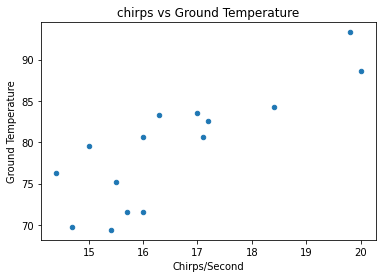

In [ ]:
df.plot(x='Chirps/Second' , y = 'Ground Temperature', kind = 'scatter' )
plt.title('chirps vs Ground Temperature')
plt.show()

In [ ]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [ ]:
x = df.loc[:,['Chirps/Second']].values
y = df.loc[:,'Ground Temperature'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
A = LinearRegression()
A.fit(x_train,y_train)

LinearRegression()

Chart the original data and the equation on the chart

In [ ]:
df.columns

Index(['Chirps/Second', 'Ground Temperature'], dtype='object')

In [ ]:
temp = df[['Chirps/Second']].values

In [ ]:
pred = A.predict(temp)

In [ ]:
df1 = pd.DataFrame({'Chirps': df['Chirps/Second'],'Ground': pred})

In [ ]:
df.sort_values(by = 'Chirps/Second', inplace = True)

In [ ]:
df1.sort_values(by = 'Chirps', inplace = True)

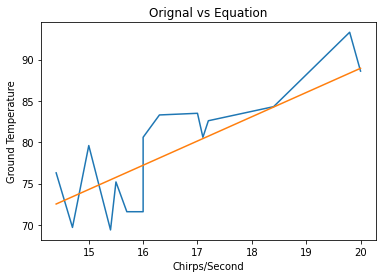

In [ ]:
plt.plot(df['Chirps/Second'],df['Ground Temperature'])
plt.plot(df1['Chirps'],df1['Ground'])
plt.title('Orignal vs Equation')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()

Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
y_pred = A.predict(x_test)

In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7139577052645383


Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [ ]:
a = df.loc[:,['Ground Temperature']].values
b = df.loc[:,'Chirps/Second'].values

In [ ]:
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test = train_test_split(a,b, test_size= 0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
Z = LinearRegression()
Z.fit(a_train,b_train)

LinearRegression()

In [ ]:
Z.predict([[95]])

array([20.37842806])

Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [ ]:
A.predict([[18]])

array([83.08181071])